<a href="https://colab.research.google.com/github/TuringCollegeSubmissions/viljin-DA.1/blob/master/215.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Data Analysis

## Sprint 1: Introduction to SQL & Statistics Fundamentals

## Part 5: Analysis of the Mental Health in the Tech Industry

## About this Part

Congrats!
You have reached the last Part of this Sprint.
As the final assignment of this Sprint, you will analyse the Mental Health in the Tech Industry Dataset.
You will have to apply all that you have learned about SQL, Statistics, and Data Analysis to complete this task.
Our expectation is that you'll use your own judgement how to perform the analysis and how to select the most important avenues of exploration.
You'll have to iteratively raise hypotheses and use your data analysis skills to get answers.

P.S. we don't expect this project to be perfect - you will continue to improve your skills and there will be many projects for you to apply your newly gained skills in the future.
For now just use what you have learned and try your best!

## Objectives for this Part

- Practice working with SQLite datasets.
- Practice performing EDA.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries and filtering data using SQL and Pandas.

## Requirements

- Download the data from [Mental Health in the Tech Industry](https://www.kaggle.com/anth7310/mental-health-in-the-tech-industry).
- Load the data using SQLite and Pandas.
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface or did you explored the dataset in depth?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structure? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?

## Sample Correction Questions

During a correction, you may get asked questions that test your understanding of covered topics.

## Correction

During your project correction, you should present your project as if talking to a product manager and senior data analyst working in your team.
You will have to find the right balance between explaining the business side and the technical aspects of your work.
You can assume that both of your colleagues have a strong understanding of and are very interested in the business aspect of your project, so be sure to clearly explain what new insights you've found while analyzing the dataset and which directions look the most promising for further research.
However, you should also spend time explaining the technical aspects of your work, especially the more complex or unconventional choices.

During a correction, you may get asked questions that test your understanding of covered topics.

- What are the main types and subtypes of data?
- What are the main metrics of location? What advantages and disadvantages each of them have?
- What is variability? What are the main metrics of variability? What advantages and disadvantages each of them have?
- What is correlation? How do we use it to analyse data?
- What is a contingency table?


## Introduction

- [Open Source Mental Illness](https://osmhhelp.org/) is a non-profit organization that works to help people identify and overcome mental health disorders while working in the tech industry.
- They conduct surveys to assess attitudes toward mental health in the workplace. These surveys are used to investigate the prevalence of mental health disorders among tech workers.
- They write detailed guides on how to make the workplace safe and supportive for people who are mentally stressed.
- They also assist workspaces in identifying the best resources to support their employees.
- Check out [Talks at Google](https://youtu.be/NHulgcO_16U) to learn more about mental health in the tech industry.

This project's data comes from the [Mental Health In Tech Industry Data](https://www.kaggle.com/anth7310/mental-health-in-the-tech-industry) survey, which was conducted between 2014 and 2019. The database is made up of two important tables, "Question" and "Answer," and one unimportant table, "Survey." 

In [1]:
%%capture
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
from plotly.subplots import make_subplots
color = ["lightblue", "teal", "royalblue", "navy", "gray", "black"]
from google.colab import drive
drive.mount('/content/drive')
!pip install matplotlib --upgrade


## The Data

In [2]:
con = sql.connect("/content/drive/My Drive/turingcollege/mental_health.sqlite")

answer_data = pd.read_sql_query("SELECT * FROM Answer", con)
answer_data.head()


,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1


In [3]:
question_data = pd.read_sql_query("SELECT * FROM Question", con)
question_data.head()


,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5


In [4]:
print(
    f'Records in the "Answer" table: {answer_data.shape[0]}\
\n\nRecords in the "Question" table: {question_data.shape[0]}'
)


Records in the "Answer" table: 236898

Records in the "Question" table: 105


In [5]:
print(
    f'Duplicated Rows in the "Answer" Table: {answer_data.duplicated().sum()}\
\n\nDuplicated Rows in the "Question" Table: {question_data.duplicated().sum()}'
)


Duplicated Rows in the "Answer" Table: 0

Duplicated Rows in the "Question" Table: 0


In [6]:
print(
    f"Missing Values in the Answer Table:\n{answer_data.isnull().sum()}\
\n\nMissing Values in the Question Table:\n{question_data.isnull().sum()}"
)


Missing Values in the Answer Table:
AnswerText    0
SurveyID      0
UserID        0
QuestionID    0
dtype: int64

Missing Values in the Question Table:
questiontext    0
questionid      0
dtype: int64


### What was the total number of people who took the survey? 

In [7]:
query = """
        SELECT COUNT(DISTINCT UserID) AS RespondentCount
        FROM Answer
        """
respondents_total = pd.read_sql(query, con)
print(f"A total of {respondents_total.iloc[0].values} respondents")


A total of [4218] respondents


###  How many people took part in the survey each year?

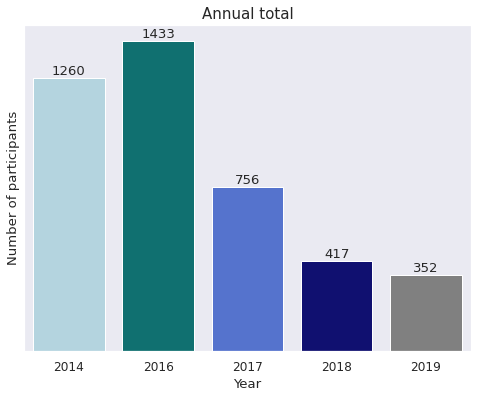

In [8]:
query = """
        SELECT SurveyID AS Year, COUNT(DISTINCT UserID) AS RespondentCount
        FROM Answer
        GROUP BY SurveyID
        ORDER BY SurveyID
        """
yearly_respondents = pd.read_sql(query, con)

sns.set_style("darkgrid")
sns.set(font_scale=1.1)
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=yearly_respondents, x="Year", y="RespondentCount", palette=color)
plt.title("Annual total", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Number of participants")
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.show()


### Are there any repeat respondents? 

In [9]:
query = """
        WITH RespondentsByYear AS (SELECT SurveyID, UserID
                                   FROM Answer
                                   GROUP BY SurveyID, UserID)
        SELECT UserID AS ReturningRespondents, COUNT(UserID) AS Returns
        FROM RespondentsByYear
        GROUP BY UserID
        HAVING COUNT(UserID) > 1
        """
returning_respondents = pd.read_sql(query, con)
print(
    f"There were {returning_respondents['ReturningRespondents'].count()} \
repeat respondents."
)


There were 0 repeat respondents.


Records from previous survey years can be safely combined because there are no repeat survey respondents. 

Because this EDA's focus is on mental health in the tech industry, we need to know how many survey respondents are actually affected by it.

For example, which respondents work in the tech industry (question 9) and which have a role in tech/IT (question 13)? 

In [10]:
query = """WITH Status as (SELECT "Employed in Tech" AS Status, 
                                   (CASE
                                      WHEN AnswerText = "1" THEN "Yes"
                                      WHEN AnswerText = "0" THEN "No"
                                      ELSE "No Answer"
                                      END) AS Result, 
                                    COUNT(DISTINCT UserID) AS RespondentCount
                            FROM Answer
                            WHERE QuestionID = 9 and SurveyID != 2014
                            GROUP BY Result
                            UNION ALL
                            SELECT "Role in Tech" AS Status, 
                                   (CASE
                                      WHEN AnswerText = "1" THEN "Yes"
                                      WHEN AnswerText = "0" THEN "No"
                                      ELSE "No Answer"
                                      END) AS Result,  
                                    COUNT(DISTINCT UserID) AS RespondentCount
                            FROM Answer
                            WHERE QuestionID = 13 AND SurveyID != 2014
                            GROUP BY Result)
           SELECT Status,
                  MAX(CASE WHEN Result = "Yes" THEN RespondentCount END) AS Yes,
                  MAX(CASE WHEN Result = "No" THEN RespondentCount END) AS No,
                  MAX(CASE WHEN Result = "No Answer" THEN RespondentCount END) 
                  AS "No Answer"
           FROM Status
           GROUP BY Status
        """
tech_respondents = pd.read_sql(query, con, index_col="Status")
tech_respondents


,Yes,No,No Answer
Status,,,
Employed in Tech,1857,597,504
Role in Tech,1471,100,1387


Those employed in technology and those with a role in technology may overlap. So, how many tech respondents are there in total?

In [11]:
query = """SELECT COUNT(DISTINCT UserID) as TechRespondents
           FROM Answer
           WHERE (SurveyID != 2014 
           AND (QuestionID = 9 AND AnswerText = 1) 
           OR (QuestionID = 13 AND AnswerText = 1))
        """
tech_respondents = pd.read_sql(query, con)
tech_respondents

print(
    f"{tech_respondents.iloc[0].values} respondents from the technology industry \
participated in the Mental Health Survey. \n\
Only their UserIDs will be used for further investigation."
)


[2419] respondents from the technology industry participated in the Mental Health Survey. 
Only their UserIDs will be used for further investigation.


## Looking into the survey questions 

#### How many survey questions are there in total?

In [12]:
query = """
        SELECT DISTINCT QuestionID, QuestionText
        FROM Question
        """
questions = pd.read_sql(query, con)

print(f"The data set contains {questions.shape[0]} survey questions.")


The data set contains 105 survey questions.


#### How many survey questions were asked each year? 

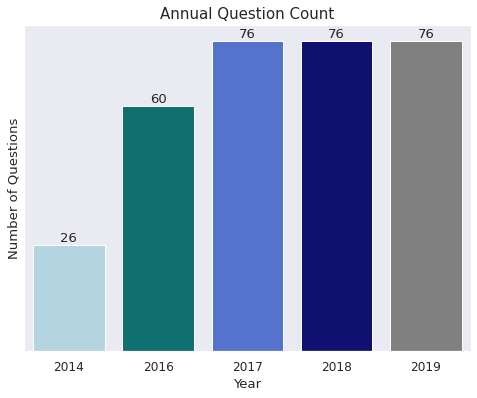

In [13]:
query = """
        SELECT SurveyID AS Year, COUNT(DISTINCT QuestionID) AS QuestionCount
        FROM Answer 
        GROUP BY Year
        ORDER BY Year
        """
yearly_question_count = pd.read_sql(query, con)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=yearly_question_count, x="Year", y="QuestionCount", palette=color)
plt.title("Annual Question Count", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Number of Questions")
ax.bar_label(ax.containers[0])
plt.yticks([])
plt.show()


While the number of respondents has decreased significantly since the first survey, the number of survey questions has increased significantly.

#### Are there any questions that appear in multiple years of the survey? 

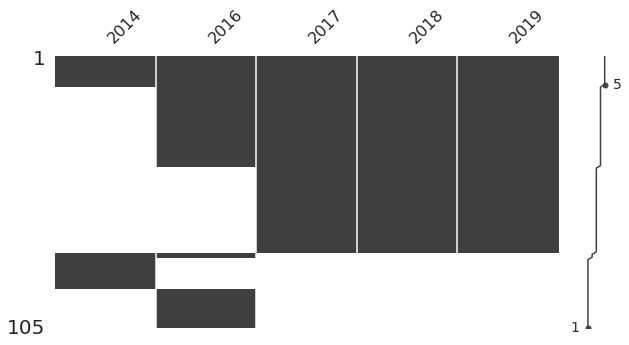

In [14]:
query = """ 
        SELECT Answer.SurveyID, Answer.QuestionID, 
        Question.questiontext AS QuestionText
        FROM Question
        INNER JOIN Answer ON Question.QuestionID=Answer.QuestionID
        GROUP BY SurveyID, Question.QuestionID
        ORDER BY SurveyID, Question.QuestionID
        """
questions_by_year = pd.read_sql(query, con)
questions_by_year = pd.pivot(
    questions_by_year, columns="SurveyID", index="QuestionID", values="QuestionText"
)
questions_by_year = questions_by_year.rename_axis("", axis="columns")

msno.matrix(questions_by_year, figsize=(10, 5))
plt.show()


We can see that respondents were given the same questionnaires in 2017, 2018, and 2019. Some of the questions were also asked in all of the surveys. Let's look at which of the questionnaires should be looked into to create a comprehensive analysis of mental health in the tech industry. 

First and foremost, we must determine which of the following questions fully overlap: 

In [15]:
same_questions = questions_by_year.dropna()
same_questions.iloc[:, :1].style.set_properties(**{"text-align": "left"})



,2014
QuestionID,
1,What is your age?
2,What is your gender?
3,What country do you live in?
4,"If you live in the United States, which state or territory do you live in?"
5,Are you self-employed?
6,Do you have a family history of mental illness?
7,Have you ever sought treatment for a mental health disorder from a mental health professional?
8,How many employees does your company or organization have?
9,Is your employer primarily a tech company/organization?


These questions appear to reveal far too little about the mental health and working environments of tech employees. Would leaving 2014 questions behind and sticking with repeated questions from surveys from 2016 to 2019 do more justice? 

In [16]:
questions_2016_2019 = questions_by_year.iloc[:, 1:].dropna()
questions_2016_2019 = questions_2016_2019.iloc[:, :1]
questions_2016_2019.style.set_properties(**{"text-align": "left"})



,2016
QuestionID,
1,What is your age?
2,What is your gender?
3,What country do you live in?
4,"If you live in the United States, which state or territory do you live in?"
5,Are you self-employed?
6,Do you have a family history of mental illness?
7,Have you ever sought treatment for a mental health disorder from a mental health professional?
8,How many employees does your company or organization have?
9,Is your employer primarily a tech company/organization?


Repeated questions from surveys from 2016 to 2019 appear to provide a comprehensive overview of the mental health situation in the tech industry, including data on employee willingness to discuss mental health issues in the workplace. Even so, the unanswered questions necessitate a second look. 

In [17]:
questions_2016 = questions_by_year.iloc[:, 1:2].dropna()
questions_2016 = questions_2016[~questions_2016[2016].isin(questions_2016_2019[2016])]
questions_2016.style.set_properties(**{"text-align": "left"})



,2016
QuestionID,
90,Do you think that discussing a physical health issue with your employer would have negative consequences?
91,Do you feel that your employer takes mental health as seriously as physical health?
104,Do you think that discussing a mental health disorder with your employer would have negative consequences?
105,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
106,"If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?"
107,"If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?"
108,Do you think that discussing a mental health disorder with previous employers would have negative consequences?
109,Do you think that discussing a physical health issue with previous employers would have negative consequences?
110,Would you have been willing to discuss a mental health issue with your previous co-workers?


In [18]:
questions_2017 = questions_by_year.iloc[:, 2:3].dropna()
questions_2017 = questions_2017[~questions_2017[2017].isin(questions_2016_2019[2016])]
questions_2017.style.set_properties(**{"text-align": "left"})



,2017
QuestionID,
57,Would you feel more comfortable talking to your coworkers about your physical health or your mental health?
58,Have you ever discussed your mental health with your employer?
59,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions."
60,Have you ever discussed your mental health with coworkers?
61,Describe the conversation with coworkers you had about your mental health including their reactions.
62,Have you ever had a coworker discuss their or another coworker's mental health with you?
63,Describe the conversation your coworker had with you about their mental health (please do not use names).
64,"Overall, how much importance does your employer place on physical health?"
65,"Overall, how much importance does your employer place on mental health?"


The 2016 survey includes some additional questions about the perceived threat of discussing mental health issues, but provides little information to help explain why this is the case.
The 2017-2019 surveys take a more descriptive approach. They ask open-ended questions to better understand the quality of employees' prior experiences discussing mental health issues with coworkers, supervisors, and others. It is understandable that the 2017-2019 surveys drew fewer participants because they require more effort to complete the questionnaires.

Because this EDA takes a quantitative approach, it is preferable to have as many observations as possible. As a result, the overlapping questions from the 2016-2019 surveys were chosen as the focal point of this study. 

## The General Mental Health Situation in the Tech Industry

### How many of the respondents were ever affected by a mental health issue?
i.e., they reported to currently have or to have had a mental disorder in the past

In [19]:
query = """WITH DisorderStatus AS (SELECT UserID,
                                         "Had in Past" AS Status, 
                                         (CASE
                                           WHEN AnswerText = "Yes" THEN 3
                                           WHEN AnswerText IN 
                                           ("Don't Know", "Possibly", "Maybe") 
                                           THEN 1
                                           ELSE 0
                                           END) AS Answer
                                   FROM Answer
                                   WHERE QuestionID = 32
                                   UNION ALL
                                   SELECT UserID,
                                         "Currently Have" AS Status, 
                                          (CASE
                                            WHEN AnswerText = "Yes" THEN 3
                                            WHEN AnswerText IN 
                                            ("Don't Know", "Possibly", "Maybe") 
                                            THEN 1
                                            ELSE 0
                                            END) AS Answer
                                    FROM Answer
                                    WHERE QuestionID = 33),
                  AnswerSum AS (SELECT UserID, SUM(Answer) AS Ans
                                FROM DisorderStatus
                                WHERE UserID IN (SELECT DISTINCT UserID
                                                 FROM Answer
                                                 WHERE (SurveyID != 2014 
                                                 AND (QuestionID = 9 
                                                 AND AnswerText = 1) 
                                                 OR (QuestionID = 13 
                                                 AND AnswerText = 1)))
                                                 GROUP BY UserID),
                  AnswerCount AS (SELECT COUNT(UserID) AS Count, Ans
                        FROM AnswerSum
                        GROUP BY Ans)
                  SELECT "Yes" AS MentalDisorder,
                         SUM(CASE WHEN Ans >= 3 THEN Count END)
                         AS RespondentCount
                  FROM AnswerCount
                  UNION ALL
                  SELECT "Maybe" AS MentalDisorder,
                          SUM(CASE WHEN Ans > 0 AND Ans <3 THEN Count END) 
                          AS RespondentCount
                  FROM AnswerCount
                  UNION ALL
                  SELECT "No" AS MentalDisorder,
                          SUM(CASE WHEN Ans = 0 THEN Count END)
                          AS RespondentCount
                  FROM AnswerCount
          """
disorder_status = pd.read_sql(query, con)
disorder_status


,MentalDisorder,RespondentCount
0,Yes,1312
1,Maybe,545
2,No,562


### How many tech respondents have ever been diagnosed with a mental illness?

In [20]:
query = """SELECT COUNT(AnswerText) as RespondentCount, 
                 (CASE WHEN Answertext in ("Yes", "No") THEN AnswerText
                       ELSE "No answer" 
                       END) AS DiagnosedDisorder
           FROM Answer
           WHERE QuestionID = 34 AND UserID IN (SELECT DISTINCT UserID
                                                FROM answer
                                                WHERE (surveyID != 2014 
                                                AND (questionID = 9 
                                                AND answertext = 1) 
                                                OR (questionID = 13 
                                                AND answertext = 1))) 
           GROUP BY DiagnosedDisorder
         """
diagnosis_status = pd.read_sql(query, con)
diagnosis_status


,RespondentCount,DiagnosedDisorder
0,581,No
1,727,No answer
2,1111,Yes


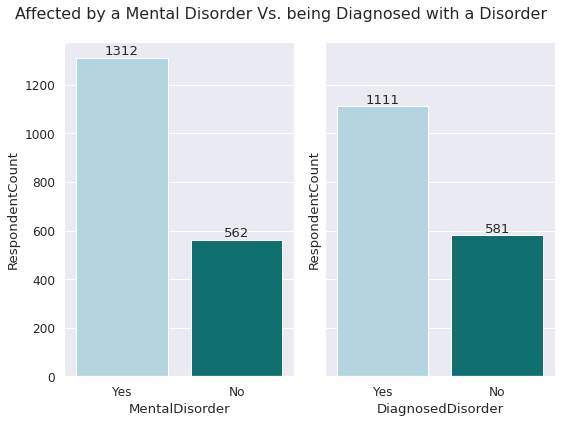

In [21]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8, 6))
fig.suptitle("Affected by a Mental Disorder Vs. being Diagnosed with a Disorder")
order = ["Yes", "No"]
sns.barplot(
    data=disorder_status,
    x="MentalDisorder",
    y="RespondentCount",
    ax=ax[0],
    order=order,
    palette=color,
)
ax[0].bar_label(ax[0].containers[0])
sns.barplot(
    data=diagnosis_status,
    x="DiagnosedDisorder",
    y="RespondentCount",
    ax=ax[1],
    order=order,
    palette=color,
)
ax[1].bar_label(ax[1].containers[0])
plt.tight_layout()


According to survey results, more than half of respondents have been affected by a mental health disorder at some point in their lives, and 85% have been officially diagnosed.
As a result, mental health disorders appear to be a truly pressing issue in the technology industry.

### How has the work of those who have ever had a mental disorder been affected?
How frequently does the disorder interfere with their work if it is treated effectively, and how does it interfere when it is not? 

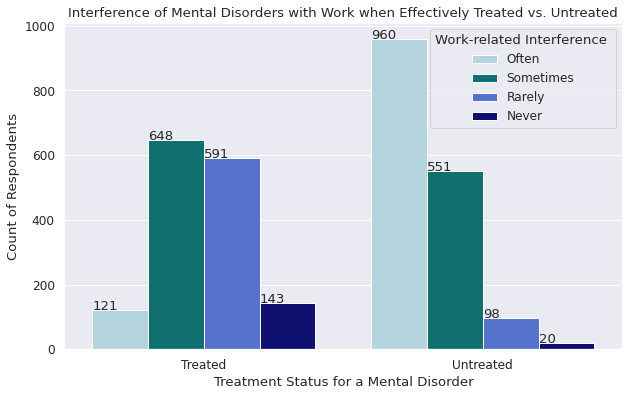

In [22]:
query = """WITH Tech as (SELECT DISTINCT userID
                         FROM answer
                         WHERE (surveyID != 2014 
                         AND (questionID = 9 AND answertext = 1) 
                         OR (questionID = 13 and answertext = 1))),
        
                TreatmentStatus AS (SELECT "Treated" AS TreatmentStatus, 
                                   Answertext AS Result, 
                                   COUNT(DISTINCT UserID) AS Count
                           FROM Answer
                           WHERE QuestionID = 48 and UserId in Tech
                           GROUP BY Result
                           UNION ALL
                           SELECT "Untreated" AS TreatmentStatus, 
                                   Answertext AS Result, 
                                   COUNT(DISTINCT UserID) AS Count
                           FROM Answer
                           WHERE QuestionID = 49 and userId in Tech
                           GROUP BY Result)
           
           SELECT TreatmentStatus,
                  MAX(CASE WHEN Result = "Never" THEN Count END) AS Never,
                  MAX(CASE WHEN Result = "Often" THEN Count END) AS Often,
                  MAX(CASE WHEN Result = "Rarely" THEN Count END) AS Rarely,
                  MAX(CASE WHEN Result = "Sometimes" THEN Count END) 
                  AS Sometimes
           FROM TreatmentStatus
           GROUP BY TreatmentStatus
         """
disorder_treatment = pd.read_sql(query, con)
disorder_treatment_melted = pd.melt(
    disorder_treatment,
    id_vars=["TreatmentStatus"],
    value_vars=["Often", "Sometimes", "Rarely", "Never"],
    var_name="Interference",
    value_name="RespondentCount",
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=disorder_treatment_melted,
    y="RespondentCount",
    x="TreatmentStatus",
    hue="Interference",
    palette=color,
)


def addbarlabel(percent=None):
    """
    Returns labels for every barplot container with y values and y values 
    rounded to the nearest tenth with a % symbol if the parameter is 
    specified as "%".
    
    Parameters:
     percent (str) : Default=None; "%" to form labels with percent symbol

    Returns:
     (str) : Labels for barplot containers
  """
    for p in ax.patches:
        if percent == "%":
            txt = str(p.get_height().round(1)) + "%"
        else:
            txt = str(int(p.get_height()))
        txt_x = p.get_x()
        txt_y = p.get_height()
        ax.text(txt_x, txt_y, txt)


addbarlabel()
plt.title(
    "Interference of Mental Disorders with Work \
when Effectively Treated vs. Untreated"
)
plt.xlabel("Treatment Status for a Mental Disorder")
plt.ylabel("Count of Respondents")
plt.legend(title="Work-related Interference ")
plt.show()


There appears to be significant differences in the work quality of employees in the technology industries when their mental disorders are well managed versus when they are not.
When mental health is well-cared for, work quality is less likely to suffer.

As a result, employers in the technology industry should pay special attention to employees with mental disorders and offer assistance to improve their well-being and the company's capabilities.

The promotion of employee openness about their mental health is the first step in effective mental disorder treatment.

As a result, the next section of this EDA will focus on employee willingness to discuss mental health issues in the workplace, as well as an investigation of the factors that influence their openness. 

## Transparency Regarding Mental Health in the Tech
How at ease do employees feel discussing a mental health issue during an interview with potential employers, coworkers, or bosses? 

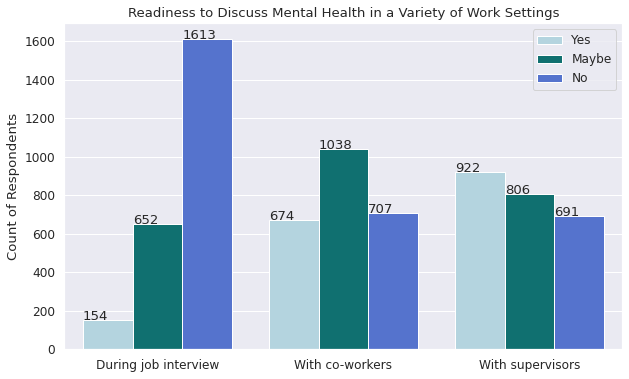

In [23]:
query = """WITH Tech AS (SELECT DISTINCT UserID
                         FROM Answer
                         WHERE (SurveyID != 2014 
                         AND (QuestionID = 9 AND AnswerText = 1) 
                         OR (QuestionID = 13 AND AnswerText = 1))),
        
                SharingSituation AS (SELECT "During job interview" 
                                                AS SharingSituation, 
                                                Answertext AS Result, 
                                                COUNT(DISTINCT UserID) AS Cnt
                                        FROM Answer
                                        WHERE QuestionID = 12 and UserId in Tech
                                        GROUP BY Result
                                        UNION ALL
                                        SELECT "With co-workers" 
                                                AS SharingSituation, 
                                                Answertext AS Result, 
                                                COUNT(DISTINCT UserID) AS Cnt
                                        FROM Answer
                                        WHERE QuestionID = 18 and userId in Tech
                                        GROUP BY Result
                                        UNION ALL
                                        SELECT "With supervisors" 
                                                AS SharingSituation, 
                                                Answertext AS Result, 
                                                COUNT(DISTINCT UserID) AS Cnt
                                        FROM Answer
                                        WHERE QuestionID = 19 and userId in Tech
                                        GROUP BY Result)         
          SELECT SharingSituation,
                 MAX(CASE WHEN Result = "Yes" THEN Cnt END) AS Yes,
                 MAX(CASE WHEN Result = "Maybe" THEN Cnt END) AS Maybe,
                 MAX(CASE WHEN Result = "No" THEN Cnt END) AS No
          FROM SharingSituation
          GROUP BY SharingSituation
        """
answer_text = pd.read_sql(query, con)
hue_order = ["Yes", "Maybe", "No"]
answer_text_melted = pd.melt(
    answer_text,
    id_vars=["SharingSituation"],
    value_vars=["Yes", "No", "Maybe"],
    var_name="SharingStatus",
    value_name="RespondentCount",
)


plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=answer_text_melted,
    y="RespondentCount",
    x="SharingSituation",
    hue="SharingStatus",
    hue_order=hue_order,
    palette=color,
)
addbarlabel()
plt.title("Readiness to Discuss Mental Health in a Variety of Work Settings")
plt.xlabel("")
plt.ylabel("Count of Respondents")
plt.legend()
plt.show()


It is understandable that people tend to avoid discussing mental health issues during job interviews. It is surprising, however, that they are more likely to share their problems with their supervisors rather than their coworkers.

Overall, the willingness to share mental health issues with supervisors appears to be relatively high. However, when compared to the beforementioned numbers of people who have ever experienced mental illness, it appears that the situation is still far from ideal, as approximately 30% of employees with mental health disorders choose to conceal their illness from their supervisors. 

#### Mental Health Transparency and Demographic Factors

Has the willingness to discuss mental health with supervisors changed between 2017 and 2019? 

In [24]:
query = """WITH Tech AS (SELECT DISTINCT UserID
                         FROM Answer
                         WHERE (SurveyID != 2014 
                         AND (QuestionID = 9 AND AnswerText = 1) 
                         OR (QuestionID = 13 AND AnswerText = 1)))
           SELECT SurveyID AS Year, Answertext AS OpennessStatus
           FROM Answer
           WHERE QuestionID = 19 AND UserId IN Tech       
        """
openness_years = pd.read_sql(query, con)
openness_years_pivot = openness_years.groupby("Year")["OpennessStatus"].value_counts()
openness_years_pivot = openness_years_pivot.rename("RespondentCount").reset_index()
openness_years_pivot = pd.pivot(
    openness_years_pivot,
    columns="OpennessStatus",
    index="Year",
    values="RespondentCount",
)
display(openness_years_pivot)


OpennessStatus,Maybe,No,Yes
Year,,,
2016,378,329,424
2017,220,162,254
2018,116,112,129
2019,92,88,115


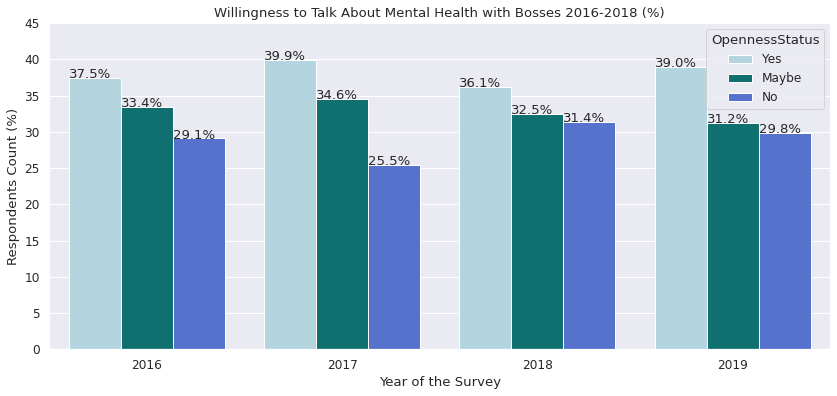

In [25]:
openness_norm = openness_years.groupby("Year")["OpennessStatus"].value_counts(
    normalize=True
)
openness_norm = openness_norm.mul(100).rename("Percent").reset_index()

plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=openness_norm, x="Year", y="Percent", hue="OpennessStatus", palette=color
)
addbarlabel("%")
ax.set_ylim(0, 45)
plt.title("Willingness to Talk About Mental Health with Bosses 2016-2018 (%)")
plt.xlabel("Year of the Survey")
plt.ylabel("Respondents Count (%)")
plt.show()


There appears to be no significant differences in respondents' willingness to share mental health problems with bosses across survey years. 

In [26]:
def transparence(questionID, columnName):

    """Returns a SQLite query for the selection of Mental Health Survey responses 
     to question 19 "Would you feel comfortable discussing a mental health issue 
     with your direct supervisor(s)?" along with responses to another preferred 
     question provided by respondents working in the tech industry. 

     Parameters:
     questionID (int): An prefered QuestionID from Mental Health Survey table
     columnName (str): A name for the column with answers corresponding to 
                       the selected QuestionID from Mental Health Survey table

     Returns:
     str: SQLite query in a string format.
  """

    query = (
        """WITH Tech AS (SELECT DISTINCT UserID
                           FROM Answer
                           WHERE (SurveyID != 2014 
                           AND (QuestionID = 9 AND AnswerText = 1) 
                           OR (QuestionID = 13 AND AnswerText = 1)))
             SELECT a.AnswerText AS """
        + str(columnName)
        + """,
                    b.AnswerText AS OpennessStatus
             FROM Answer a
             JOIN Answer b on b.UserID = a.UserID
             WHERE a.QuestionID = """
        + str(questionID)
        + """
             AND b.QuestionID = 19 AND a.UserID IN Tech
           """
    )
    return query



### In which countries did survey participants work?
How many different countries did the survey mention? 

In [27]:
work_country = pd.read_sql(transparence(50, "Country"), con)
print(
    f"The survey responses come from \
{work_country.Country.nunique()} different countries."
)


The survey responses come from 63 different countries.


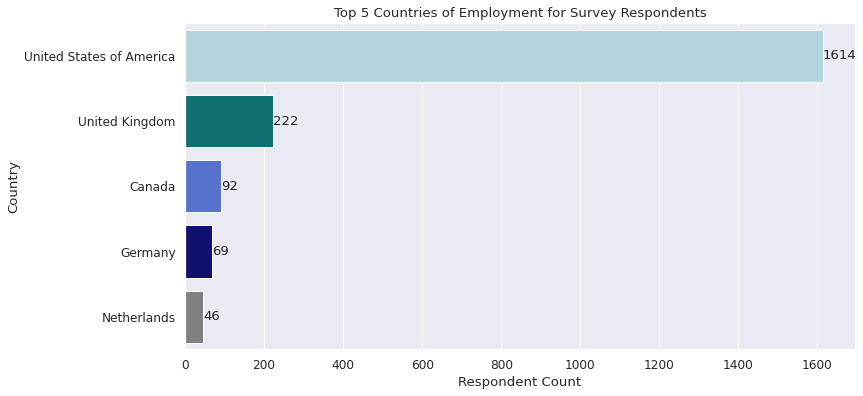

In [28]:
order = work_country["Country"].value_counts()[:5].index

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=work_country, y="Country", order=order, palette=color)
plt.title("Top 5 Countries of Employment for Survey Respondents")
plt.xlabel("Respondent Count")
plt.ylabel("Country")
ax.bar_label(ax.containers[0])
plt.show()


The vast majority of survey respondents are employed in the United States. It is still interesting to compare the willingness to discuss mental health in the United States and the top three countries on the list.

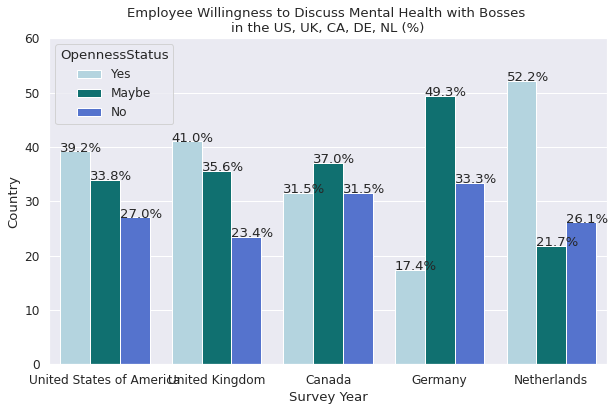

In [29]:
work_country_norm = work_country.groupby("Country")["OpennessStatus"].value_counts(
    normalize=True
)
work_country_norm = work_country_norm.mul(100).rename("Percent").reset_index()
top_countries = work_country["Country"].value_counts()[:5].index

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=work_country_norm,
    x="Country",
    y="Percent",
    hue="OpennessStatus",
    order=top_countries,
    palette=color,
)
addbarlabel("%")
ax.set_ylim(0, 60)
plt.title(
    "Employee Willingness to Discuss Mental Health with Bosses \n\
in the US, UK, CA, DE, NL (%)"
)
plt.xlabel("Survey Year")
plt.ylabel("Country")
plt.show()


Dutch culture is quite open. Germany appears to have substantially lower employee willingness to disclose mental health issues with their bosses than the other top 3 nations.
However, given there were much fewer survey participants working in Germany than in the US or UK, these disparities should be viewed with caution. 

### How is the age of respondents distributed? 
What is the relationship between employee openness about their mental health with their supervisors and employee age?


In [30]:
age = pd.read_sql(transparence(1, "Age"), con)
age.head()
age["Age"] = age["Age"].astype("int64")
age.describe()


,Age
count,2419.000000
mean,34.207524
std,9.946171
min,0.000000
25%,28.000000
50%,33.000000
75%,39.000000
max,323.000000


There are some odd numbers in the 'age' column that need to be filtered out.
Although the legal working age varies a little bit from country to country, the lower threshold of the filter will be set at 15.
The higher filter threshold will be set to a value of 90. 

In [31]:
age = age[(age["Age"] >= 15) & (age["Age"] <= 90)]
age.shape[0]


2415

Only four rows with odd data were removed. 

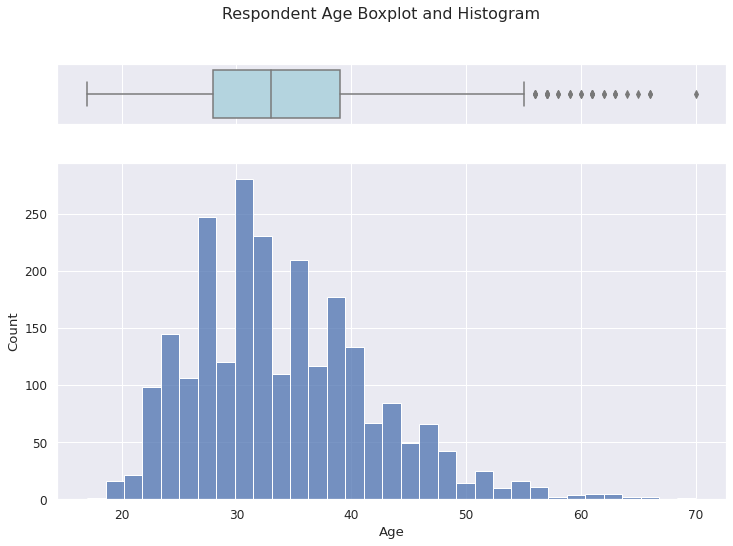

In [32]:
f, ax = plt.subplots(2, figsize=(12, 8), gridspec_kw={"height_ratios": (0.15, 0.85)})
sns.boxplot(x=age.Age, ax=ax[0], palette=color)
ax[0].set_xlabel(None)
ax[0].set_xticklabels([])
sns.histplot(x=age.Age, ax=ax[1], palette=color)
ax[1].set_xlabel("Age")
plt.suptitle("Respondent Age Boxplot and Histogram")
plt.show()


The age of survey respondents follows a normal distribution with a few outliers on the right side.
The majority of tech workers are in their mid-twenties to mid-thirties.

### How do gender differences in employee willingness to open up about mental health to supervisors differ? 

In [33]:
gender = pd.read_sql(transparence(2, "Gender"), con)
gender["Gender"].unique()


array(['Male', 'Female', 'Bigender', 'non-binary',
       'Female assigned at birth', 'fm', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Other/Transfeminine',
       'Female or Multi-Gender Femme', 'Androgynous',
       'male 9:1 female, roughly', '-1', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'Queer', 'Agender',
       'Male/genderqueer', 'Nonbinary', 'Male (trans, FtM)',
       'Genderqueer', 'Genderflux demi-girl',
       'female-bodied; no feelings about gender', 'Transgender woman',
       'male', 'female', 'uhhhhhhhhh fem genderqueer?',
       'God King of the Valajar', 'Non-binary', 'Agender/genderfluid',
       'Male-ish', 'sometimes', 'Contextual', 'Non binary',
       'Genderqueer demigirl', 'Genderqueer/non-binary', 'nonbinary',
       '\\-', 'Transfeminine', 'None', 'Ostensibly Male', 'Trans man',
       'transgender', 'non binary', 'Female/gender non-binary.',
       'Tr

Because there appears to be a wide range of genders among survey respondents, their responses will be divided into three categories: male, female, and other. 

In [34]:
query = """WITH Tech AS (SELECT DISTINCT UserID
                         FROM Answer
                         WHERE (SurveyID != 2014 
                         AND (QuestionID = 9 AND AnswerText = 1) 
                         OR (QuestionID = 13 AND AnswerText = 1)))
           SELECT (CASE
                    WHEN UPPER(a.AnswerText) LIKE "%FEM%" THEN "Female"
                    WHEN UPPER(a.AnswerText) LIKE "%WOMAN%" THEN "Female"
                    WHEN UPPER(a.AnswerText) LIKE "%MALE%" THEN "Male"
                    WHEN UPPER(a.AnswerText) LIKE "%MASCUL%" THEN "Male"
                    ELSE "Other"
                    END) AS Gender,
                    B.AnswerText AS OpennessStatus
           FROM Answer a
           JOIN Answer b ON b.UserID = a.UserID
           WHERE a.QuestionID = 2 AND b.QuestionID = 19 AND a.UserID in Tech
           """
gender = pd.read_sql(query, con)
display(gender["Gender"].value_counts().to_frame(name="RespondentCount"))


,RespondentCount
Male,1685
Female,656
Other,78


According to the findings, men outnumber women in the tech industry. 

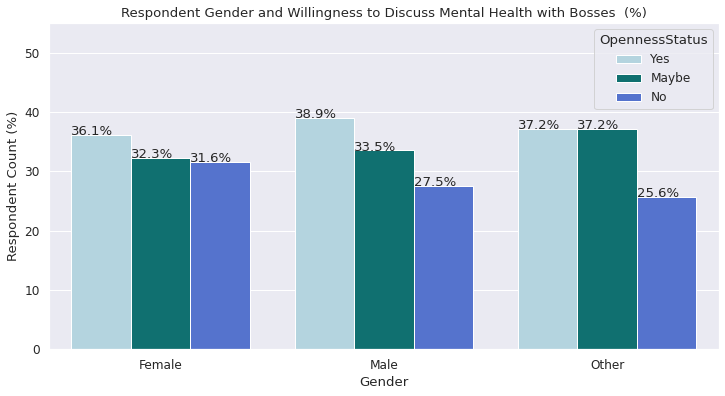

In [35]:
gender_norm = gender.groupby("Gender")["OpennessStatus"].value_counts(normalize=True)
gender_norm = gender_norm.mul(100).rename("Percent").reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=gender_norm, x="Gender", y="Percent", hue="OpennessStatus", palette=color
)
addbarlabel("%")
ax.set_ylim(0, 55)
plt.title(
    "Respondent Gender and Willingness to Discuss \
Mental Health with Bosses  (%)"
)
plt.xlabel("Gender")
plt.ylabel("Respondent Count (%)")
plt.show()


Male respondents have a tendency to speak up more about their mental health to their superiors than respondents of other genders, it became obvious after normalizing the respondent count for each gender group.
However, the variations are not very significant. 

### Transparency Regarding Mental Health and the Workplace Environment 

In this section, a number of aspects of the business climate will be examined in relation to respondents' willingness to talk to their managers about their mental health.
These variables include the size of the business, the availability of benefits for mental health, the availability of information about mental health, the formal discussion of mental health, the protection of anonymity, and the difficulty of obtaining a medical leave for mental health treatment. 

### What is the size of the companies in which tech respondents work?
Is there an effect of company size on mental health openness? 

In [36]:
company_size = pd.read_sql(transparence(8, "EmployeeCount"), con)
df = company_size["EmployeeCount"].value_counts().to_frame(name="RespondentCount")
display(df)


,RespondentCount
More than 1000,614
100-500,606
26-100,531
6-25,394
500-1000,184
1-5,90


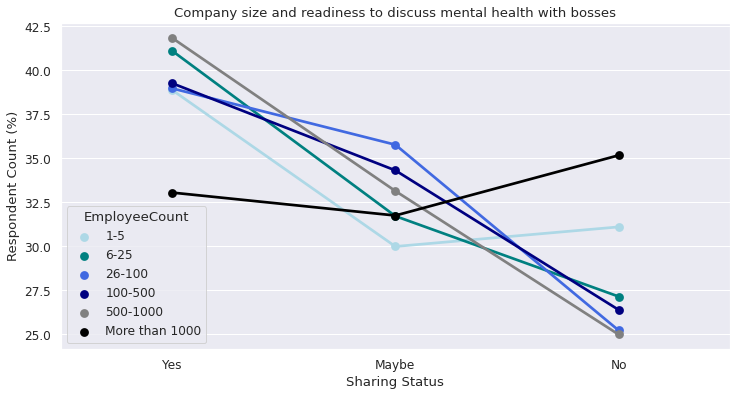

In [37]:
company_size_norm = company_size.groupby("EmployeeCount")[
    "OpennessStatus"
].value_counts(normalize=True)
company_size_norm = company_size_norm.mul(100).rename("Percent").reset_index()

order = ["Yes", "Maybe", "No"]
hue_order = ["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"]

plt.figure(figsize=(12, 6))
sns.pointplot(
    data=company_size_norm,
    x="OpennessStatus",
    y="Percent",
    hue="EmployeeCount",
    hue_order=hue_order,
    order=order,
    palette=color,
)
plt.title("Company size and readiness to discuss mental health with bosses")
plt.xlabel("Sharing Status")
plt.ylabel("Respondent Count (%)")
plt.show()


It is obvious that only employees of the biggest businesses—those with more than 1000 employees—are less ready than others to talk to managers about their mental health.
Given that a third of respondents said they work for the largest corporations, this data is important to take into account. 

### Do the employers of the respondents offer benefits for mental health as part of healthcare coverage?
How does it relate to employee mental health disclosure? 

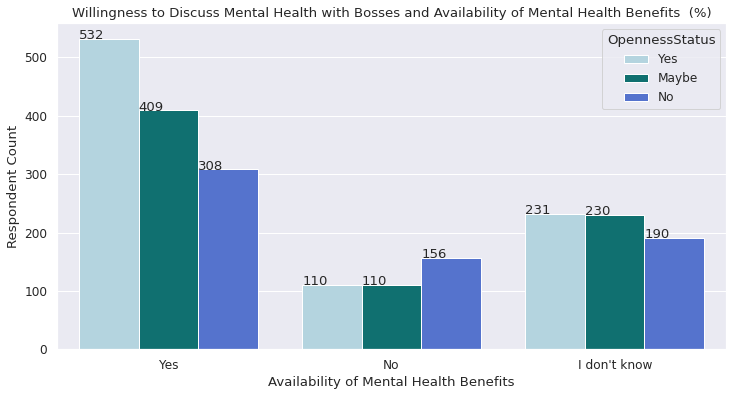

In [38]:
benefit_supply = pd.read_sql(transparence(10, "BenefitStatus"), con)
benefit_supply = benefit_supply[
    benefit_supply["BenefitStatus"] != "Not eligible for coverage / NA"
]
order = ["Yes", "No", "I don't know"]
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=benefit_supply,
    x="BenefitStatus",
    hue="OpennessStatus",
    order=order,
    palette=color,
)
addbarlabel()
plt.title(
    "Willingness to Discuss Mental Health with Bosses \
and Availability of Mental Health Benefits  (%)"
)
plt.xlabel("Availability of Mental Health Benefits")
plt.ylabel("Respondent Count")
plt.show()


The majority of businesses appear to offer mental health benefits as part of healthcare coverage, which appears to have a beneficial effect on employees' openness to discuss their mental health. 

### Are there resources available through respondents' employers to learn more about mental health illnesses and choices for getting help?
In what ways does this encourage them to discuss their mental health? 

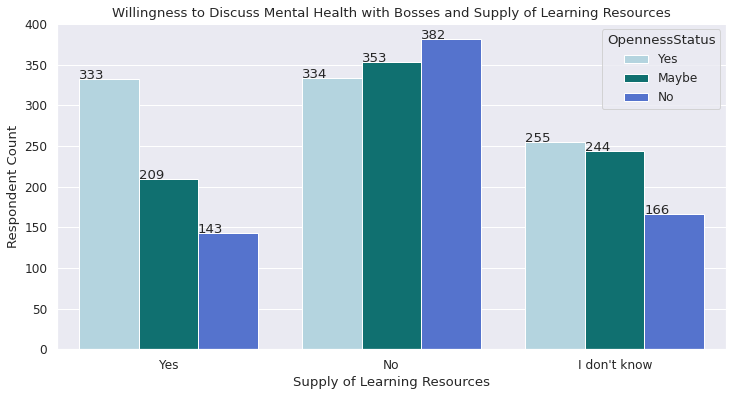

In [39]:
learning_resources = pd.read_sql(transparence(16, "LearningResources"), con)
plt.figure(figsize=(12, 6))

order = ["Yes", "No", "I don't know"]
ax = sns.countplot(
    data=learning_resources,
    x="LearningResources",
    hue="OpennessStatus",
    order=order,
    palette=color,
)
addbarlabel()
plt.title(
    "Willingness to Discuss Mental Health with Bosses and \
Supply of Learning Resources"
)
plt.xlabel("Supply of Learning Resources")
plt.ylabel("Respondent Count")
plt.show()


Nearly half of companies, according to study respondents, don't offer any resources about mental health illnesses and available treatments.
Since there is a clear correlation between the availability of learning resources and the propensity to talk openly about mental health difficulties, it is undoubtedly an area that needs improvement. 

### Do businesses in the tech sector ever formally discuss mental health with their employees?
(as part of a wellness program or other official communication)
How does it affect the willingness of employees to disclose their mental health situation? 

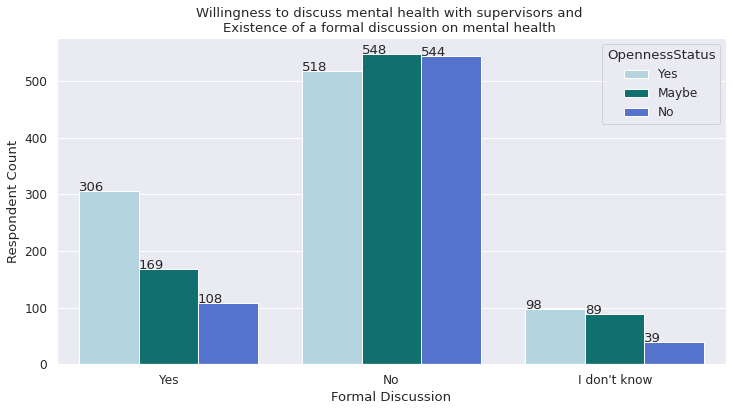

In [40]:
formal_discussion = pd.read_sql(transparence(15, "FormalDiscussion"), con)
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=formal_discussion,
    x="FormalDiscussion",
    hue="OpennessStatus",
    order=order,
    palette=color,
)
addbarlabel()
plt.title(
    "Willingness to discuss mental health with supervisors and \n\
Existence of a formal discussion on mental health "
)
plt.xlabel("Formal Discussion")
plt.ylabel("Respondent Count")
plt.show()


The majority of employees in the IT sector did not formally discuss mental health with their employers, despite the fact that it appears to have a favorable effect on employees' readiness to disclose their mental health issues to their superiors. 

### Is tech employee anonymity protected?
if they choose to use their employer's mental health or substance abuse treatment resources?
What effect does it have on their willingness to discuss mental health? 

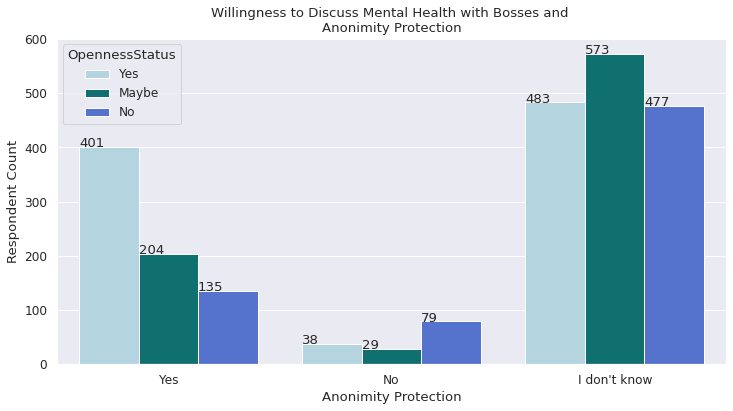

In [41]:
anonimity_promotion = pd.read_sql(transparence(11, "AnonimityProtection"), con)
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=anonimity_promotion,
    x="AnonimityProtection",
    hue="OpennessStatus",
    order=order,
    palette=color,
)
addbarlabel()
plt.title(
    "Willingness to Discuss Mental Health with Bosses and \n\
Anonimity Protection"
)
plt.xlabel("Anonimity Protection")
plt.ylabel("Respondent Count")
plt.show()


The majority of respondents admitted that they do not know if their anonymity regarding mental health is protected, which appears to increase their reluctance to discuss their problems with their supervisors. 

### How easy or difficult would it be for tech workers to request medical leave from work if they had a mental health problem?
What does this have to do with their willingness to talk about mental health issues? 

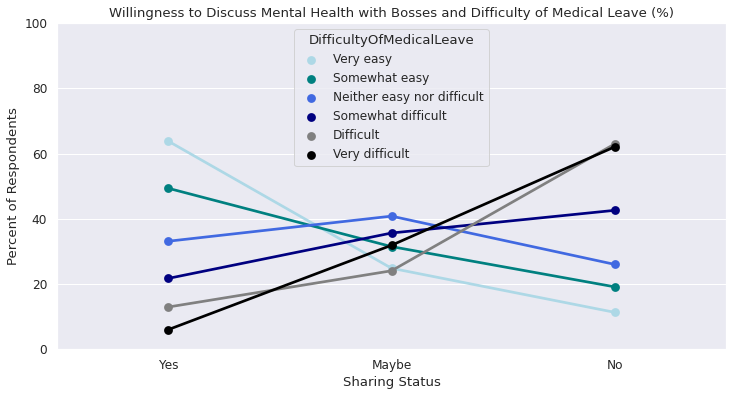

In [42]:
leave_difficulty = pd.read_sql(transparence(17, "DifficultyOfMedicalLeave"), con)
leave_difficulty_norm = leave_difficulty.groupby("DifficultyOfMedicalLeave")[
    "OpennessStatus"
].value_counts(normalize=True)
leave_difficulty_norm = leave_difficulty_norm.mul(100).rename("Percent").reset_index()

order = ["Yes", "Maybe", "No"]
hue_order = [
    "Very easy",
    "Somewhat easy",
    "Neither easy nor difficult",
    "Somewhat difficult",
    "Difficult",
    "Very difficult",
]

plt.figure(figsize=(12, 6))
sns.pointplot(
    data=leave_difficulty_norm,
    x="OpennessStatus",
    y="Percent",
    hue="DifficultyOfMedicalLeave",
    order=order,
    hue_order=hue_order,
    palette=color
)
plt.title(
    "Willingness to Discuss Mental Health with Bosses and Difficulty\
 of Medical Leave (%)"
)
plt.xlabel("Sharing Status")
plt.ylabel("Percent of Respondents")
plt.ylim(0, 100)
plt.show()


There appears to be a clear positive relationship between the ease of taking a mental health leave and employees' willingness to disclose their mental health problems to their supervisors. 

## HHow many people actually went to a mental health professional for treatment for a mental illness? 

In [43]:
answer_data.columns = ["AnswerText", "SurveyID", "UserID", "questionid"]
qa = pd.merge(answer_data, question_data, how="left", on="questionid")
survey_years = [2014, 2016, 2017, 2018, 2019]
seek_help_yoy = qa.query("questionid == 7")
percent_yoy = []
tot_yoy = []
for year in survey_years:
    tmp = seek_help_yoy[(seek_help_yoy.SurveyID == year)][
        ["AnswerText", "UserID", "SurveyID"]
    ]
    tmp2 = tmp.AnswerText.value_counts()

    percent_yoy.append(
        (tmp2.loc["1"] / (tmp2.loc["1"] + tmp2.loc["0"])) * 100
    )  # Percentage of participants who have seeked help
    tot_yoy.append(
        (tmp2.loc["1"] + tmp2.loc["0"])
    )  # Total number of participants each year
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(
        x=survey_years,
        y=percent_yoy,
        name="% seeking help",
        line=dict(color="royalblue", width=2),
    ),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(
        x=survey_years,
        y=tot_yoy,
        name="No. of participants",
        line=dict(color="black", width=2),
    ),
    secondary_y=True,
)

fig.update_layout(title_text="Percent of participants seeking help",)

fig.update_xaxes(title_text="Year of the Survey")
fig.update_yaxes(title_text="Percent of seeking help", secondary_y=False)
fig.update_yaxes(title_text="Number of participants", secondary_y=True)

fig.show()


We see that as time passes, the percentage of people seeking help for mental health grows, despite the fact that the total number of people taking the survey decreases. 

## Conclusions
- There is a serious problem with mental health illnesses in the tech sector, as more than half of respondents said they had had one at some point in their lives.
- Being open about mental health issues at work in the tech sector is still a problem that needs to be addressed because a third of their employees don't talk about mental illness with their managers.
- The relationship between willingness to share mental health issues with supervisors and the workplace environment is more direct than it is with demographic characteristics.
Therefore, it is quite possible for companies to make changes to their workforce's wellbeing. 